# 2-2. Deep clustering model analysis
__Statistical and qualitative analysis are performed on Top5 models.__

You will get:
- an Annualized log return distribution of individual cryptocurrencies in clusters
- Boxplots of mean, standard deviation, maximum drawdown
- Representative time series of clusters

OUTPUT PATH: data, rts

In [ ]:
from utils.cluster_stats import get_stats, rank_matching
from utils.cluster_dist_plot import get_dist_plot, plot_annlr, plot_boxplot
from utils.cluster_rep_ts import get_rep_ts
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.cluster import AgglomerativeClustering

SEED = 0

In [ ]:
# price data
price_data = pd.read_csv(f"data/coingecko_usd_price.csv").drop(columns=["uts"])
price_data = price_data.T

# log return data
lr_data = pd.read_csv(f"data/coin_log_return.csv")
lr_data = lr_data.T
lr_data = lr_data.drop(columns=[0]) # drop zero return

In [ ]:
# Market capitalisation
df_m = pd.read_csv("data/coingecko_usd_market_cap.csv").drop(columns="uts")

In [ ]:
# deep clustering best model
model = "umap10_arch[200, 200, 50]_c20"
k = 4

hle = pd.read_csv(f"embedding_data/hle_{model}.csv")
f_c = AgglomerativeClustering(n_clusters=k).fit(hle)
labels = f_c.labels_

In [ ]:
# statistics dataframe
df_stat_R, df_stat_lr, annl_R, annl_lr, annl_lr_std, MDD = get_stats(labels, price_data, lr_data)

# clusters' statistics
df_ranked_stat_lr = rank_matching(df_stat_lr)

In [ ]:
# clusters' annaulized log return distribution
df_dist_plot = get_dist_plot(df_ranked_stat_lr, annl_lr, annl_lr_std, MDD)

In [ ]:
# clusters' annaulized log return distribution
plot_annlr(df_dist_plot)

[Text(0, 0.5, 'cluster'), Text(0.5, 0, 'maximum drawdown [%]')]

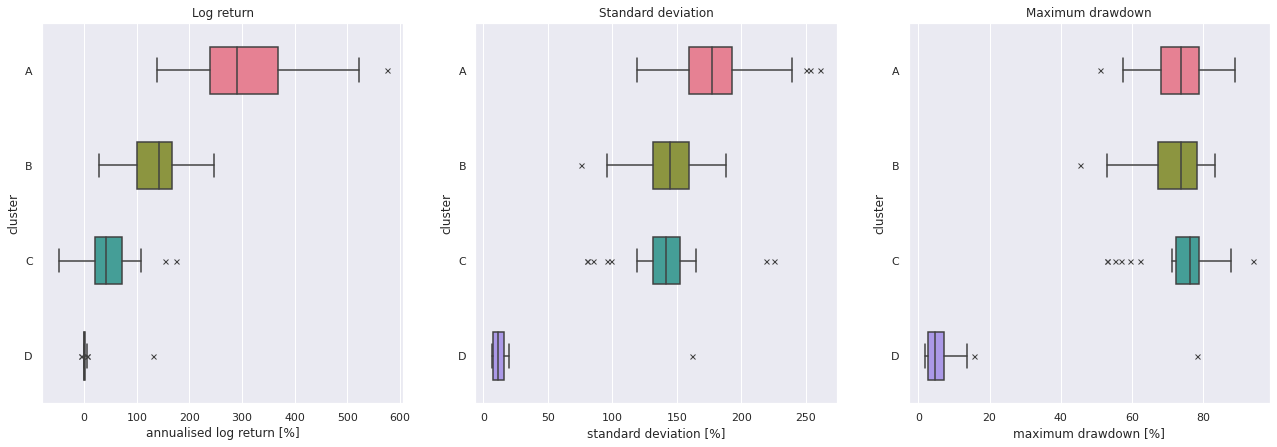

In [ ]:
# clusters' boxplot
plot_boxplot(df_dist_plot)

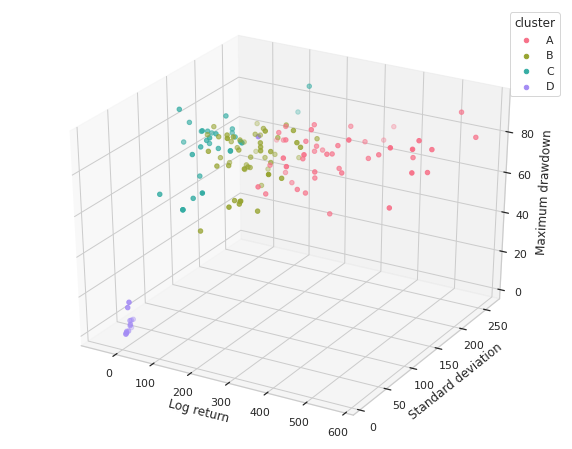

In [ ]:
# clusters' 3d plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = df_dist_plot.copy()

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

x_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_log_return[%]"]
y_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_std[%]"]
z_a = df[df["common_cluster_label"]=="A"]["crypto_mdd[%]"]

x_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_log_return[%]"]
y_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_std[%]"]
z_b = df[df["common_cluster_label"]=="B"]["crypto_mdd[%]"]

x_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_log_return[%]"]
y_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_std[%]"]
z_c = df[df["common_cluster_label"]=="C"]["crypto_mdd[%]"]

x_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_log_return[%]"]
y_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_std[%]"]
z_d = df[df["common_cluster_label"]=="D"]["crypto_mdd[%]"]

# define and map colors
colors = sns.color_palette("husl",4).as_hex()

ax.set_xlabel("Log return")
ax.set_ylabel("Standard deviation")
ax.set_zlabel("Maximum drawdown")

s_a = ax.scatter(x_a, y_a, z_a, c=colors[0], label="A")
s_b = ax.scatter(x_b, y_b, z_b, c=colors[1], label="B")
s_c = ax.scatter(x_c, y_c, z_c, c=colors[2], label="C")
s_d = ax.scatter(x_d, y_d, z_d, c=colors[3], label="D")

# produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="cluster")
# ax.add_artist(legend1)
ax.legend(title="cluster")

plt.show()

In [ ]:
# market cap of last date
last_marketcap = df_m.iloc[-1,:].sort_values(ascending=False)

In [ ]:
# clusters' representative time series
df_ts = get_rep_ts(labels)

In [ ]:
# save
df_ts.to_csv(f"rts/{model}_weighted_average_time_series.csv", index=False)